# Introduction to Numpy, Scipy, SciKit

In this tutorial we will look into the Numpy library: http://www.numpy.org/ 

Numpy is a very important library for numerical computations and matrix manipulation. It has a lot of the functionality of Matlab, and some of the functionality of Pandas 

We will also use the Scipy library for scientific computation: http://docs.scipy.org/doc/numpy/reference/index.html

In [41]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [42]:
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist
import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import scipy.sparse.linalg as linalg


### Why Numpy?###

In [2]:
import time

def trad_version():
    t1 = time.time()
    X = range(10000000)
    Y = range(10000000)
    Z = [x+y for x,y in zip(X,Y)]
    return time.time() - t1

def numpy_version():
    t1 = time.time()
    X = np.arange(10000000)
    Y = np.arange(10000000)
    Z = X + Y
    return time.time() - t1


traditional_time = trad_version()
numpy_time = numpy_version()
print ("Traditional time = "+ str(traditional_time))
print ("Numpy time       = "+ str(numpy_time))

Traditional time = 1.486330270767212
Numpy time       = 0.0519719123840332


# Arrays

### Creating Arrays###

In Numpy data is organized into arrays. There are many different ways to create a numpy array.

For the following we will use the random library of Numpy: http://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html

Creating arrays from lists

In [43]:
#1-dimensional arrays
x = np.array([2,5,18,14,4])
print ("\n Deterministic 1-dimensional array \n")
print (x)

#2-dimensional arrays
x = np.array([[2,5,18,14,4], [12,15,1,2,8]])
print ("\n Deterministic 2-dimensional array \n")
print (x)


 Deterministic 1-dimensional array 

[ 2  5 18 14  4]

 Deterministic 2-dimensional array 

[[ 2  5 18 14  4]
 [12 15  1  2  8]]


We can also create Numpy arrays from Pandas DataFrames

In [44]:
d = {'A':[1., 2., 3., 4.],
     'B':[4., 3., 2., 1.]} 
df = pd.DataFrame(d)
x = np.array(df)
print(x)

[[1. 4.]
 [2. 3.]
 [3. 2.]
 [4. 1.]]


Creating random arrays

In [45]:
#1-dimensional arrays
x = np.random.rand(5)
print ("\n Random 1-dimensional array \n")
print (x)

#2-dimensional arrays

x = np.random.rand(5,5)
print ("\n Random 5x5 2-dimensional array \n")
print (x)

x = np.random.randint(10,size=(2,3))
print("\n Random 2x3 array with integers")
print(x)


 Random 1-dimensional array 

[0.53783494 0.97630819 0.51879206 0.67937877 0.40292899]

 Random 5x5 2-dimensional array 

[[0.13412464 0.14551429 0.38064463 0.30291877 0.58893229]
 [0.6473421  0.50185785 0.55633204 0.51328668 0.88015072]
 [0.26624922 0.40354098 0.20588175 0.12066002 0.57081448]
 [0.67005012 0.97111367 0.91578105 0.79102429 0.54791651]
 [0.7078796  0.68657074 0.32238559 0.97488161 0.36761222]]

 Random 2x3 array with integers
[[3 8 9]
 [9 4 0]]


Transpose and get array dimensions

In [46]:
print("\n Matrix Dimenasions \n")
print(x.shape)
print ("\n Transpose of the matrix \n")
print (x.T)
print (x.T.shape)


 Matrix Dimenasions 

(2, 3)

 Transpose of the matrix 

[[3 9]
 [8 4]
 [9 0]]
(3, 2)


Special Arrays

In [47]:
x = np.zeros((4,4))
print ("\n 4x4 array with zeros \n")
print(x)

x = np.ones((4,4))
print ("\n 4x4 array with ones \n")
print (x)

x = np.eye(4)
print ("\n Identity matrix of size 4\n")
print(x)

x = np.diag([1,2,3])
print ("\n Diagonal matrix\n")
print(x)


 4x4 array with zeros 

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 4x4 array with ones 

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

 Identity matrix of size 4

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

 Diagonal matrix

[[1 0 0]
 [0 2 0]
 [0 0 3]]


### Operations on arrays.

These are very similar to what we did with Pandas

In [8]:
x = np.random.rand(2,4)
print (x)
print('\n mean value of all elements')
print (np.mean(x)) 
print('\n vector of mean values for columns')
print (np.mean(x,0)) #0 signifies the dimension meaning columns
print('\n vector of mean values for rows')
print (np.mean(x,1)) #1 signifies the dimension meaning rows
print('\n standard deviation of all elements')
print (np.std(x)) 
print('\n vector of std values for rows')
print (np.std(x,1)) #1 signifies the dimension meaning rows
print('\n median value of all elements')
print (np.median(x)) 
print('\n vector of median values for rows')
print (np.median(x,1)) 
print('\n sum of all elements')
print (np.sum(x)) 
print('\n vector of row sums')
print (np.sum(x,1)) 
print('\n product of all elements')
print (np.prod(x)) 
print('\n vector of row products')
print (np.prod(x,1)) 

[[0.92980124 0.26235971 0.31349188 0.15796024]
 [0.57971933 0.01936933 0.67671632 0.28443201]]

 mean value of all elements
0.40298125721144656

 vector of mean values for columns
[0.75476028 0.14086452 0.4951041  0.22119613]

 vector of mean values for rows
[0.41590327 0.39005925]

 standard deviation of all elements
0.2812331390351258

 vector of std values for rows
[0.30194762 0.25822052]

 median value of all elements
0.2989619460076671

 vector of median values for rows
[0.28792579 0.43207567]

 sum of all elements
3.2238500576915725

 vector of row sums
[1.66361307 1.56023699]

 product of all elements
2.6108313911834475e-05

 vector of row products
[0.01207984 0.00216131]


### Manipulating arrays###

Accessing and Slicing

In [49]:
x = np.random.rand(4,3)
print(x)
print("\n row zero \n")
print(x[0,:])
print("\n column 2 \n")
print(x[:,2])
print("\n submatrix \n")
print(x[1:3,0:2])
print("\n entries > 0.5 \n")
print(x[x>0.5])
print("\n element\n")
print(x[1,2])

[[0.15838215 0.19032855 0.87439066]
 [0.795922   0.33585017 0.5767837 ]
 [0.14352436 0.53963765 0.35263949]
 [0.54351032 0.96181959 0.75321956]]

 row zero 

[0.15838215 0.19032855 0.87439066]

 column 2 

[0.87439066 0.5767837  0.35263949 0.75321956]

 submatrix 

[[0.795922   0.33585017]
 [0.14352436 0.53963765]]

 entries > 0.5 

[0.87439066 0.795922   0.5767837  0.53963765 0.54351032 0.96181959
 0.75321956]

 element

0.5767837014635865


Changing entries

In [50]:
x = np.random.rand(4,3)
print(x)

x[1,2] = -5 #change an entry
x[0:2,:] += 1 #change a set of rows
x[2:4,1:3] = 0.5 #change a block
print(x)

print('\n Set entries > 0.5 to zero')
x[x>0.5] = 0
print(x)

print('\n Diagonal \n')
x = np.random.rand(4,4)
print(x)
print('\n Read Diagonal \n')
print(x.diagonal())
print('\n Fill Diagonal with 1s \n')
np.fill_diagonal(x,1)
print(x)
print('\n Fill Diagonal with vector \n')
x[np.diag_indices_from(x)] = [1,2,3,4]
print(x)

[[0.56369432 0.5434819  0.22922235]
 [0.86864467 0.47058716 0.63370259]
 [0.90105056 0.50960832 0.63499154]
 [0.33013835 0.66096788 0.23366034]]
[[ 1.56369432  1.5434819   1.22922235]
 [ 1.86864467  1.47058716 -4.        ]
 [ 0.90105056  0.5         0.5       ]
 [ 0.33013835  0.5         0.5       ]]

 Set entries > 0.5 to zero
[[ 0.          0.          0.        ]
 [ 0.          0.         -4.        ]
 [ 0.          0.5         0.5       ]
 [ 0.33013835  0.5         0.5       ]]

 Diagonal 

[[6.74574059e-01 4.33935530e-04 2.88459576e-01 8.19951854e-01]
 [8.17007629e-01 1.81250480e-01 2.93831763e-01 9.00964769e-01]
 [2.30947683e-01 2.76437156e-01 2.67828343e-01 4.07172973e-01]
 [5.06151032e-01 3.72090374e-01 6.09953800e-01 2.71259880e-01]]

 Read Diagonal 

[0.67457406 0.18125048 0.26782834 0.27125988]

 Fill Diagonal with 1s 

[[1.00000000e+00 4.33935530e-04 2.88459576e-01 8.19951854e-01]
 [8.17007629e-01 1.00000000e+00 2.93831763e-01 9.00964769e-01]
 [2.30947683e-01 2.76437156e-01

### Operations with Arrays

Multiplication and addition with scalar

In [51]:
x = np.random.rand(4,3)
print(x)

#multiplication and addition with scalar value
print("\n Matrix 2x+1 \n") 
print(2*x+1)

[[0.83379004 0.8402916  0.46754945]
 [0.74683796 0.01444197 0.57056453]
 [0.54779092 0.26707997 0.96607979]
 [0.94325592 0.55473534 0.65097405]]

 Matrix 2x+1 

[[2.66758007 2.6805832  1.93509889]
 [2.49367592 1.02888393 2.14112907]
 [2.09558184 1.53415993 2.93215958]
 [2.88651184 2.10947068 2.30194811]]


Vector-vector dot product and external product

In [54]:
y = np.array([2,-1,3])
z = np.array([-1,2,2])
print('\n y:',y)
print(' z:',z)
print('\n vector-vector dot product')
print(y.dot(z))
print(np.dot(y,z))

print('\n vector-vector external product')
print(np.outer(y,z))

print(y*z)


 y: [ 2 -1  3]
 z: [-1  2  2]

 vector-vector dot product
2
2

 vector-vector external product
[[-2  4  4]
 [ 1 -2 -2]
 [-3  6  6]]
[-2 -2  6]


Matrix-Vector multiplication

In [56]:
x = np.random.rand(4,3)
print(x)
y = np.array([1,0,0])
print("\n Matrix-vector right multiplication\n")
print(x.dot(y))
y = np.array([1,0,1,0])
print("\n Matrix-vector left multiplication\n")
print(y.dot(x))

[[0.57414835 0.60014621 0.90124434]
 [0.23254951 0.55910828 0.24681229]
 [0.31849585 0.2266375  0.6571828 ]
 [0.03958882 0.51072343 0.35910869]]

 Matrix-vector right multiplication

[0.57414835 0.23254951 0.31849585 0.03958882]

 Matrix-vector left multiplication

[0.89264421 0.82678371 1.55842714]


Matrix-Matrix multiplication

In [57]:
y = np.random.rand(3,2)
z = x.dot(y)
print("\n Matrix-matrix multiplication\n")
print(x)
print(y)
print (z)


 Matrix-matrix multiplication

[[0.57414835 0.60014621 0.90124434]
 [0.23254951 0.55910828 0.24681229]
 [0.31849585 0.2266375  0.6571828 ]
 [0.03958882 0.51072343 0.35910869]]
[[0.88261114 0.37163707]
 [0.02681445 0.48841017]
 [0.70421268 0.26127786]]
[[1.15751002 0.74196752]
 [0.39405132 0.42398478]
 [0.74998161 0.40076424]
 [0.3015252  0.35798234]]


### Creating Sparse Arrays ###

For sparse arrays we need to use the sp_sparse library from SciPy:
http://docs.scipy.org/doc/scipy/reference/sparse.html

There are three types of sparse matrices:
<ul>
<li><i>csr:</i> compressed row format 
<li><i>csc:</i> compressed column format
<li><i>lil:</i> list of lists format
</ul>
These different types have to do with the matrix implementation and the data structures used. 

### Creation of matrix from triplets

Triplets are of the form (row, column, value)

In [60]:
import scipy.sparse as sp_sparse

d = np.array([[0, 0, 12],
              [0, 1, 1],
              [0, 5, 34],
              [1, 3, 12],
              [1, 2, 6],
              [2, 0, 23],
              [3, 4, 14],
              ])
row = d[:,0]
col = d[:,1]
data = d[:,2]
# a matrix M with M[row[i],col[i]] = data[i] will be created
M = sp_sparse.csr_matrix((data,(row,col)), shape=(5,6))
print(M)
print(M.toarray()) #transforms back to full matrix

  (0, 0)	12
  (0, 1)	1
  (0, 5)	34
  (1, 2)	6
  (1, 3)	12
  (2, 0)	23
  (3, 4)	14
[[12  1  0  0  0 34]
 [ 0  0  6 12  0  0]
 [23  0  0  0  0  0]
 [ 0  0  0  0 14  0]]


Making a full matrix sparse

In [61]:
x = np.random.randint(2,size = (3,4))
print(x)
print('\n make x sparce')
A = sp_sparse.csr_matrix(x)
print(A)

[[0 0 1 0]
 [0 1 1 0]
 [0 0 1 0]]

 make x sparce
  (0, 2)	1
  (1, 1)	1
  (1, 2)	1
  (2, 2)	1


Creating a sparse matrix incrementally

In [41]:
# Use lil (list of lists) representation
A = sp_sparse.lil_matrix((10, 10))
A[0, :5] = np.random.randint(10,size = 5)
A[1, 5:10] = A[0, :5]
A.setdiag(np.random.randint(10,size = 10))
A[9,9] = 99
A[9,0]=1
print(A.toarray())
print(A.diagonal())
A = A.tocsr() # makes it a compressed column format. better for dot product.
B = A.dot(np.ones(10))
print(B)

[[  2.   5.   6.   9.   2.   0.   0.   0.   0.   0.]
 [  0.   9.   0.   0.   0.   9.   5.   6.   9.   2.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   8.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   9.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   8.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   7.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   7.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   3.   0.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.  99.]]
[  2.   9.   0.   8.   9.   8.   7.   7.   3.  99.]
[  24.   40.    0.    8.    9.    8.    7.    7.    3.  100.]


All operations work like before

In [ ]:
o = np.ones((6,1))
print(M.dot(o))
print(M.dot(M.T))

## Singluar Value Decomposition

For the singular value decomposition we will use the libraries from Numpy and SciKit

Numpy: http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

SciKit: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.linalg.svds.html

(100, 50) (50,) (50, 50)
[1.00000000e+00 7.78800783e-01 3.67879441e-01 1.05399225e-01
 1.83156389e-02 1.93045414e-03 1.23409804e-04 4.78511739e-06
 1.12535175e-07 1.60522806e-09 1.38879439e-11 7.28783603e-14
 2.30082689e-16 9.55352709e-17 7.81897619e-17 7.81897619e-17
 7.81897619e-17 7.81897619e-17 7.81897619e-17 7.81897619e-17
 7.81897619e-17 7.81897619e-17 7.81897619e-17 7.81897619e-17
 7.81897619e-17 7.81897619e-17 7.81897619e-17 7.81897619e-17
 7.81897619e-17 7.81897619e-17 7.81897619e-17 7.81897619e-17
 7.81897619e-17 7.81897619e-17 7.81897619e-17 7.81897619e-17
 7.81897619e-17 7.81897619e-17 7.81897619e-17 7.81897619e-17
 7.81897619e-17 7.81897619e-17 7.81897619e-17 7.81897619e-17
 7.81897619e-17 7.81897619e-17 7.81897619e-17 7.81897619e-17
 7.81897619e-17 2.30465658e-17]


Text(0.5, 0, 'number of eigenvalues')

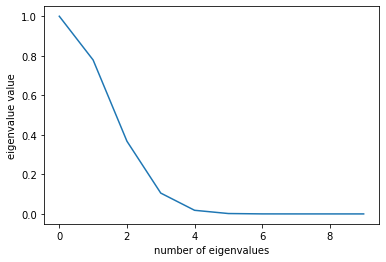

In [63]:
import sklearn.datasets as sk_data

data = sk_data.make_low_rank_matrix(n_samples=100, n_features=50, effective_rank=2, tail_strength=0.0, random_state=None)
#sns.heatmap(data, xticklabels=False, yticklabels=False, linewidths=0)

U, s, V = np.linalg.svd(data,full_matrices = False) 
print (U.shape, s.shape, V.shape)
print(s)
plt.plot(s[0:10])
plt.ylabel('eigenvalue value')
plt.xlabel('number of eigenvalues')

(100, 50)
(100, 6) (6,) (6, 50)
[ 0.00193045  0.01831564  0.10539922  0.36787944  0.77880078  1.        ]


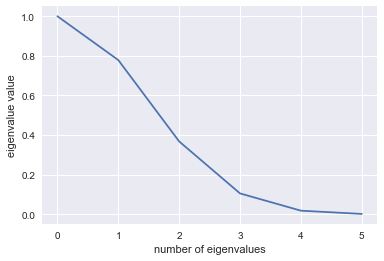

In [44]:
import scipy.sparse.linalg as sp_linalg

data2 = sp_sparse.csc_matrix(data)
print(data2.shape)
U,s,V = sp_linalg.svds(data2) #by default returns k=6 singular values
print (U.shape, s.shape, V.shape)
print(s)
plt.plot(s[::-1])
plt.ylabel('eigenvalue value')
plt.xlabel('number of eigenvalues')

(100, 6) (6,) (6, 50)
[ 0.00193045  0.01831564  0.10539922  0.36787944  0.77880078  1.        ]
1.32412769174
0.867936716599
0.383123327806
0.106996266627
0.018417506182
0.00193440069837
0.000123502590094


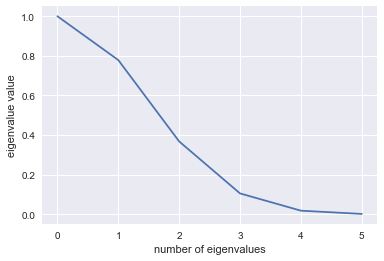

In [68]:
K = 6
U_k,s_k,V_k = sp_linalg.svds(data2, K, which = 'LM')
print (U_k.shape, s_k.shape, V_k.shape)
print(s_k)
plt.plot(s_k[::-1])
plt.ylabel('eigenvalue value')
plt.xlabel('number of eigenvalues')
S_k = np.diag(s_k)

for k in range(K,0,-1):
    data_k = U_k[:,k:].dot(S_k[k:,k:]).dot(V_k[k:,:])
    print(np.linalg.norm(data_k-data2,ord='fro'))
data_k = U_k.dot(S_k).dot(V_k)
print(np.linalg.norm(data_k-data2,ord='fro'))

## An example

In [1]:
import numpy as np

M1 = np.random.randint(1,50,(50,5))
M2 = np.random.randint(1,10,(50,5))
M3 = np.random.randint(1,10,(50,5))
M4 = np.random.randint(1,50,(50,5))

T = np.concatenate((M1,M2),axis=1)
B = np.concatenate((M3,M4),axis=1)
M = np.concatenate([T,B],axis = 0)

(-0.806944460828334, 0.004779481628664546)
(-0.9965735165179481, 6.7335390409381936e-108)


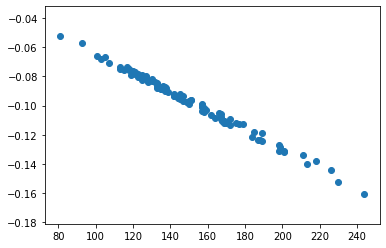

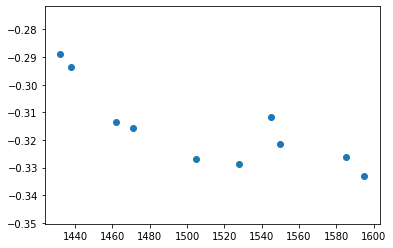

In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt

(U,S,V) = np.linalg.svd(M,full_matrices = False)
c = M.sum(0)
r = M.sum(1)
print(stats.pearsonr(c,V[0]))
print(stats.pearsonr(r,U[:,0]))
plt.scatter(r,U[:,0])
plt.figure()
plt.scatter(c,V[0])

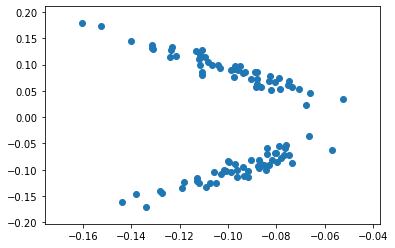

In [14]:
plt.scatter(U[:,0],U[:,1])

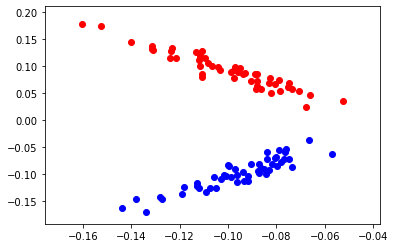

In [16]:
plt.scatter(x = U[:50,0],y = U[:50,1],color='r')
plt.scatter(x = U[50:,0],y = U[50:,1], color = 'b')